# TensorFlow

The mathematical concept of a tensor could be broadly in this way, if a scalar has the lowest dimensionality and is followed by a vector and then by a matrix, a tensor would be the next object in line, scalar, vectors and matrices are all tensor is of rank 0,1 and 2 respectively.
___

#### TensorFlow vs Sklearn

The tensorFlow is probably the leading library for neural network, including deep neural network, convolution neural network and recurrent neural networks.

One of the biggest advantages of tensorflow is it uses not only the CPU of the computer but also as GPU, this is crucial for the speed of algorithms, as in this way tensorflow utilizes much more computing power, the best part it that this is done automatically.

Sklearn doesn't offer the same functionality as tensorflow regarding neural networks, having said that we can make the opposite point for other fields of machine learning, in the presence of problem as k means clustering and random forest, sklearn could be a better fit even though tensorflow started to make way.
___

#### TensorFlow 1 vs TensorFlow 2.0

TensorFlow 1 is one of the most widely used deep learning package, that's largely due to its great versatility which makes it the preffered choice of many practitioners, unfortunately it has one major drawback it is very hard to learn and use, that's why many people are disheartened after seeing just a couple of lines of tensorflow code, not only is a method strange but the whole logic of coding is unlike most libraries out there.

THis led to the development and popularization of high level packages such as pytorch and keras, keras is particularly in 2017 it was integrated in the core tensorflow, a feat that may sound a bit strange at first.

In reality though both tensorflow and keras are open source, so it shouldn't be surprising that such things happen in their programming world.

Keras's author claims that keras is conceived as an interface for tensorflow rather than a different package, making this integration even easier to digest and implement.

TensorFlow 2.0 came on the horizen or at least its alpha version, we can say that tensorflow effort to catch up with the current demand for higher level programming, instead of creating their own high level syntax, the TF developers chose to borrow that of keras, this decision make sense, keras already widely adopeted and peopel generally love it, so on this note it may hear people say tensorflow 2.0 is basically keras and that isn't far from the truth.

The tensorflow 2.0 has the best of both worlds, most of the versatility of TF 1 and the high level simplicity of keras, there are also other majoy advantages of TF 2.0 over TF 1, simplified API and remove duplicate and deprecated functions and added new functions in the core tensorflow.

What's important is that tensorflow to boasts eager execution or in other words allowing standard python rules of physics to it rather than complex computational graphs.
___

TensorFlow is a deep learning library, developed by Google, that allows us to create fairly complicated models with littel coding.

## Minimal example with TensorFlow 2.0

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

#### Data generation

In [2]:
observations = 1000

xs = np.random.uniform(low = -10, high = 10, size = (observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

# in the project to work on, it will have a dataset
# this dataset maybe the excel or csv
# but tensorflow doesn't work well with them
# it is tensor based so it likes tensors
# so it need a format that can store the information in tensors
# one solution to this problem is .npz files
# this is basically numpy file's type
# it allows to save nd arrays or n dimensional arrays
# it can say tensor is can be represented as multi-dimensional arrays
# so when read it, the data is already organized in the desired way
# this is an important part of deep learning pre processing
# data than preprocess and finally save in .npz
# later build the algorithm and using the .npz instead of the original file
# the inputs and targets can called arbitrary names
# executing the code would save the TF_intro file in the same directory

np.savez('TF_intro', inputs = generated_inputs, targets = generated_targets)

#### Sloving with TensorFlow

In [3]:
training_data = np.load('TF_intro.npz')

In [4]:
# there are 2 inputs variables, the xs and zs

input_size = 2

# there is only 1 output variable, the y

output_size = 1

# tf means the tensorflow
# TF 2 is based on keras, so that's the module needed to build a model
# Sequential is the function which indicates that we are laying down the model
# it takes as arguments the different layers we'd like to include in this algorithm
# it takes inputs applies a single linear transformation and provides outputs
# these linear combinations together with the outputs constitute the so-called output layer
# the Dense method takes the provides inputs and calculates the dot product of the inputs and weights and adds the bias

model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size)
                            ])

# it configures the model for training
# it include several different arguments
# the first is optimizer or the optimization algorithm
# SGD stands for stochastic gradient descent
# the SGD as a generalzation of the gradient descent concept
# the second include is loss function
# the L2-norm loss = least sum of squares(least sum of squared error)
# moreover scaling by the number of observations is equivalent to finding an average or a mean
# the mean_squared_error is actually L2-norm scale by the number of observations
# if we want to custom the learning rate
# it can use custom_optimized = tf.keras.optimizers.SGD(learning_rate = 0.02)
# than the model.compile(optimizer = custom_optimized, loss = 'mean_squared_error')

model.compile(optimizer = 'sgd', loss = 'mean_squared_error')

# it got left is to indicate to the model which data to fit
# the tensorflow 2.0 employees a fit method with two mandatory arguments
# from the inputs tensor from the variable training data
# and the targets which are contained in the targets tensor from the training data
# so this same method is also the place where we set the number of iterations
# each iterations over the full data set in machine learning is called Epoch
# set verbose to 0

model.fit(training_data['inputs'], training_data['targets'], epochs = 100, verbose = 1)

# we get nothing more than an output signifying that the model has been trained and stored in an objects with no information about the training
# the reasons is that we set verbose to 0 which stands for silent or no output about the training is displayed
# the verbose is 0, that stands for silent
# the verbose is 1, that stands for progress bar
# the verbose is 2, that stands for one line per epoch
# so the one line per epoch which allows us to follow the development of the loss function over the training
# the first piece is a timer, tracking the timer and took in 1s to complete first epoch
# the second output available on each line is the current value of the loss function
# scroll down through the epochs, it can confirm that the loss function is in fact decreasing
# so it can know the algorithm has worked as intended
# we generated the function 2x-3z+5+noise, in order to be able to assess how the model did
# but in real life situation, it never know the exact relationship, so it wouldn't to be possible to confirm how well the model has fared


Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 1s 593us/sample - loss: 51.2318
Epoch 2/100
1000/1000 [==============================] - 0s 47us/sample - loss: 4.4232
Epoch 3/100
1000/1000 [==============================] - 0s 47us/sample - loss: 1.4546
Epoch 4/100
1000/1000 [==============================] - 0s 46us/sample - loss: 0.6582
Epoch 5/100
1000/1000 [==============================] - 0s 46us/sample - loss: 0.4316
Epoch 6/100
1000/1000 [==============================] - 0s 46us/sample - loss: 0.3752
Epoch 7/100
1000/1000 [==============================] - 0s 48us/sample - loss: 0.3567
Epoch 8/100
1000/1000 [==============================] - 0s 50us/sample - loss: 0.3503
Epoch 9/100
1000/1000 [==============================] - 0s 49us/sample - loss: 0.3471
Epoch 10/100
1000/1000 [==============================] - 0s 49us/sample - loss: 0.3451
Epoch 11/100
1000/1000 [==============================] - 0s 48us/sample - loss: 0.3476
Epoch 12/100
1000

Epoch 94/100
1000/1000 [==============================] - 0s 47us/sample - loss: 0.3533
Epoch 95/100
1000/1000 [==============================] - 0s 46us/sample - loss: 0.3529
Epoch 96/100
1000/1000 [==============================] - 0s 47us/sample - loss: 0.3484
Epoch 97/100
1000/1000 [==============================] - 0s 47us/sample - loss: 0.3475
Epoch 98/100
1000/1000 [==============================] - 0s 46us/sample - loss: 0.3501
Epoch 99/100
1000/1000 [==============================] - 0s 47us/sample - loss: 0.3499
Epoch 100/100
1000/1000 [==============================] - 0s 48us/sample - loss: 0.3509


#### Extract the weights and biases

In [5]:
# there is a convenience built in method called get weights that could be applied to each layer for this purpose
# the model is the model we create
# must specify the layer we are interested in, in this case the only layer, so that at position 0
# finally we have to apply the method get_weights
# the output is a tensor with two arrays
# one for the weights, and one for the biases

model.layers[0].get_weights()

[array([[ 1.9724275],
        [-3.022165 ]], dtype=float32), array([4.97869], dtype=float32)]

In [6]:
# the result is anticipated, the weights is approximately 2 and -3

weights = model.layers[0].get_weights()

weights

[array([[ 1.9724275],
        [-3.022165 ]], dtype=float32), array([4.97869], dtype=float32)]

In [7]:
# while the bias is 5
# weight and bias is precisely the information which comfirms that our algorithm has indeed learned the underlying relationship

bias = model.layers[0].get_weights()[1]

bias

array([4.97869], dtype=float32)

#### Extract the outputs (make predictions)

In [8]:
# to predict this model
# it ues the method predict_on_batch method
# the batch here is the data that we provided with
# the result comprises an array with a corresponding outputs for each of the inputs
# in fact these are the values that are compared to the targets to evaluate the loss function
# to be precise, these are the outputs based on the train model or in this case the outputs after 100 epoch of training

model.predict_on_batch(training_data['inputs']).numpy().round(1)

array([[ -7. ],
       [  4. ],
       [ 46.3],
       [-10.2],
       [ -8.3],
       [-31.9],
       [ 47.5],
       [-13.3],
       [-16.8],
       [  3.8],
       [ 30.9],
       [-17.7],
       [ 27.9],
       [-39.3],
       [ 23.9],
       [ 21.4],
       [ 39.2],
       [-13.7],
       [ 22.2],
       [ 13.1],
       [-21.7],
       [ 44.2],
       [-17.6],
       [  6.4],
       [-29.4],
       [  6. ],
       [-35.8],
       [  2.9],
       [ 25.5],
       [ -6.2],
       [  4.8],
       [  8.4],
       [  8.3],
       [ -3.4],
       [ 14.7],
       [-11.3],
       [ 13.1],
       [-12.4],
       [-32.8],
       [  6.4],
       [ 33.3],
       [ 10.3],
       [-31.5],
       [ 13.3],
       [-15. ],
       [ 48. ],
       [ 22.4],
       [ 30.2],
       [-32.2],
       [ 30.5],
       [ -0.9],
       [  5.8],
       [ -5.3],
       [  8.8],
       [ 10.6],
       [-20.8],
       [-11.5],
       [ 29.5],
       [ -9. ],
       [ -2.1],
       [ 11.5],
       [ 18.6],
       [

In [9]:
training_data['targets'].round(1)

array([[ -6.9],
       [  4.2],
       [ 47. ],
       [-10.5],
       [ -7.3],
       [-32.2],
       [ 48.5],
       [-14. ],
       [-16.5],
       [  4.4],
       [ 31.2],
       [-16.9],
       [ 29.1],
       [-39.2],
       [ 24.8],
       [ 20.1],
       [ 40.2],
       [-14. ],
       [ 21.9],
       [ 13. ],
       [-21.9],
       [ 44.4],
       [-17.9],
       [  6.9],
       [-29.4],
       [  5.6],
       [-36.2],
       [  3.7],
       [ 25.9],
       [ -5.7],
       [  4.2],
       [  7.5],
       [  7.9],
       [ -3.8],
       [ 15.1],
       [-11. ],
       [ 14.2],
       [-11.6],
       [-33.4],
       [  6.2],
       [ 33.2],
       [ 11.2],
       [-32.4],
       [ 14.2],
       [-15.5],
       [ 48.2],
       [ 22.4],
       [ 29.9],
       [-33.1],
       [ 30.9],
       [ -1.3],
       [  6.3],
       [ -4.7],
       [  9.1],
       [ 11.3],
       [-20.6],
       [-12.3],
       [ 30.5],
       [ -9.6],
       [ -1.4],
       [ 11.4],
       [ 18.4],
       [

#### Plotting the data

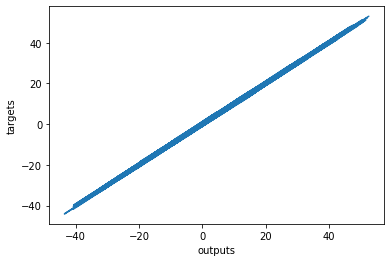

In [10]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))

plt.xlabel('outputs')
plt.ylabel('targets')

plt.show()